# Biol 359A | Data, distributions, variance, and correlation

## Spring 2024, Week 1
---
Objectives:
- Gain familiarity with fundamental concepts in python programming and Jupyter Notebooks
- Gain intuition for how parameter changes affect distribution shapes for common distributions
- Gait intuition for Pearson's coorelation and Spearman's coorelation

Section 1 contains a very broad overview of jupyter notebooks, programming concepts, and python programming concepts more specifically. It is not meant to be comprehensive, but to introduce some fundamental ideas about programming and programming specifically in Python. It is here for your references. There are no questions in section 1 and it may be skipped.

Note that in Jupyter Notebooks you can collapse sections by clicking the arrow to the left of headers. Try collapsing Section 1 now.

### Section 1: Introduction to python programming

#### Jupyter Notebooks

All coding in this course will be completed in Jupyter Notebooks (like this one!). Jupyter Notebooks present runable code cells alongside markdown cells. You can run the code cells by holding `shift` and hitting `enter`. Run the two code cells below.

In [24]:
a_variable = "I am a variable!"


In [27]:
a_variable # This will print the value of a_variable

'I am not a variable!'

**IT IS VERY IMPORTANT TO NOTE:** that the order in which you execute code in a Jupyter Notebook is EXTREMELY IMPORTANT. For instance, run the code in the cell below this markdown cell, and then the cell immediately above this markdown cell. The value of `a_variable` will be determined by the latest cell you've run, not necessarily the cell physically located above it.

In [26]:
a_variable = "I am not a variable!"

#### Data Types

At the hardware level, computers store all their data using the binary system, which means that every piece of information is represented as a series of 0s and 1s. This includes numbers, letters, and everything else we see on a screen. However, the same series of 0s and 1s can have different meanings. For example, the 8-bit binary sequence "01000001" is the binary code for both number 65 and the letter A.

Given that everything is stored in these binary sequences, how does a computer know if the series "01000001" stored in memory should be interpreted as a number, a letter, or something else?

Data types solve this problem. They tell the computer the type of data a binary sequence represents, ensuring it translates and treats the data appropriately.

In [29]:
# The print() function is used to output data to the console. In Jupyter Notebooks, the last line of a cell is automatically printed.
# Here we use print() statements to output all lines of the cell
print(1)
print(1 + 1)
print('A')
print('A' + 'A')

1
2
A
AA


Above, the behavior of the + operator is different depending on what it is between. When between two `1`s, it performed addition, but when between two `A`'s, it performed [concatonation](https://www.merriam-webster.com/dictionary/concatenate#h2). This is because `1` and `A` are different data types.

In [30]:
# The type() function returns the data type of the data it receives as an argument.
print(type(1))
print(type('A'))

<class 'int'>
<class 'str'>


You can see that `1` is of type 'int', or integer, and `A` is of type 'str', or string. These are two common data types. Integers are whole numbers and strings are letters, words, and number that are meant to be read.

In [31]:
print(type("This is a string"))
print(type("I can write 2 strings")) # Even though this string contains an integer, it is still a string.
print(type('1')) # Because this is wrapped in quotes, this is a string, not an integer.
print('1' + '1') # This will output 11, because the 1's are strings, not integers, and the + operator concatonates strings.

<class 'str'>
<class 'str'>
<class 'str'>
11


These are some other common datatypes:

In [32]:
print(type(1.0)) # Floats are numbers with decimal points.
print(type(True)) # Booleans are either True or False.
print(type(None)) # None represents the absence of a value.

<class 'float'>
<class 'bool'>
<class 'NoneType'>


#### Variables

Variables hold a piece of data or a value and allow you to reference it by a name

In [34]:
length = 2 # length is a variable. Variables are used to store data that can be used later in the program.
width = 3 # width is another variable.
area = length * width # area is a third variable. It is the product of the length and width variables.
area

6

Variables promote code flexibility and readability. We will use them extensively.

#### Data Structures

You can think of data structures as containers that hold data or variables. Python has some built-in data structures types.

In [8]:
print(type([1, 2, 3])) # Lists allow you to keep items in a specific order and allow you to add and remove items.
print(type((1, 2, 3))) # Tuples are similar to lists, but they are immutable, meaning you cannot change them by adding or removing items.
print(type({1: "one", 2: "two", 3: "three"})) # Dictionaries are used to store key-value pairs.

<class 'list'>
<class 'tuple'>
<class 'dict'>


You can use data structures to store other data structures:

In [9]:
print(type([[1, 2, 3], ["a", "b", "c"], [1.0, 2.0, 3.0]])) # This is a list of lists.
print(type((1, [1, 2, 3], "A"))) # This is a tuple containing an integer, a list, and a string.
print(type({"A": [1, 2, 3], "B": ["a", "b", "c"], "C": [1.0, 2.0, 3.0]})) # This is a dictionary containing lists as values.

<class 'list'>
<class 'tuple'>
<class 'dict'>


Python has a large library of packages, or collections of code written by other organizations or individuals, that you can use. A frequently used package in data analysis is pandas. Pandas gives you access to a data structure called a dataframe, which is essentially a matrix for storing data.

In [11]:
import pandas # This imports the pandas package.

In [12]:
df = pandas.DataFrame({"A": [1, 2, 3], "B": ["A", "B", "C"], "C": [1.0, 2.0, 3.0]}) # This creates a pandas DataFrame.
df

,A,B,C
0,1,A,1.0
1,2,B,2.0
2,3,C,3.0


We will use pandas dataframes extensively in this course

#### Functions

Functions are used to perform specific tasks. They can take arguments as input and return values. Here is an example of a function that takes two arguments and returns their sum.

In [35]:
def find_sum(a, b): # This is a function that takes two arguments and returns their sum.
    return a + b

In [36]:
print(find_sum(1, 2))
print(find_sum(2, 3))

3
5


Functions allow you to perform a task many times without rewriting code. They make code more readable and enable repetetive tasks to be solved efficiently. Many functions have been defined in python packages. We will be using functions extensively throughout this course. 

In fact, we have already used several functions in this notebook! For example, the `print()` function prints its argument, the `type()` function returns the type of its argument, and the `pandas.DataFrame()` (which is defined in the pandas package) makes a new DataFrame.

## Section 2: Data exploration: distributions and variance
---


It is a best practice in python to import the packages you use in each file near or at the top of the file. Here are import statements for the packages we will use throughout the rest of this notebook.

The packages used are as follows
- `pandas` provides dataframes for data storage and manipulation
- `ipywidgets` provides dynamic notebook widgets (like sliders)
- `scipy` us a general scientific computing package
- `numpy` is a general math/matrices package
- `matplotlib` Provides data visualization functionality

Using "as" creates an alias or alternate name for packages. Some packages have commonly used aliases as shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as stats

In our recent class, we covered the topics of expected values and variances as ways to describe data. To get a better feel for what these terms mean, we're going to create some example data. This practical exercise will help us understand the implications of these measures.

### Normal Distribution

Let's imagine we recorded the flipper lengths of 1000 penguins, measured in centimeters. The code above creates 1000 synthetic data points drawn from a normal distribution given an expected value and variance and prepares two plots for display.

In [4]:

# Function to generate data plot and normal distribution plot based on provided mean and variance
def plot_syn_data_and_distribution(mean=20, variance=1):
    sigma = np.sqrt(variance)  # Standard deviation is the square root of variance
    
    # Data for the scatter plot
    data = np.random.normal(mean, sigma, 100)
    
    # Data for the normal distribution plot
    x = np.linspace(10, 30, 1000)
    y = stats.norm.pdf(x, mean, sigma)
    
    # Setup figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter Plot on the first subplot
    axs[0].scatter(range(len(data)), data)
    axs[0].set_title('Synthetic Flipper Length Data', fontsize=16)
    axs[0].set_xlabel('Sample Index', fontsize=14)
    axs[0].set_ylabel('Flipper Length (cm)', fontsize=14)
    axs[0].set_ylim(10, 30)
    axs[0].set_xlim(0, 100)
    axs[0].grid(True)
    
    # Normal Distribution Plot on the second subplot
    axs[1].plot(x, y)
    axs[1].set_title('Synthetic Flipper Length Data Distribution', fontsize=16)
    axs[1].set_xlabel('Flipper Length (cm)', fontsize=14)
    axs[1].set_ylabel('Probability Density', fontsize=14)
    axs[1].set_xlim(10, 30)
    axs[1].set_ylim(0, max(y) + 0.05)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Custom label for the expected value slider using HTML to ensure visibility
expected_value_label = widgets.HTML('<div style="width:100px;">Expected Value:</div>')

# Creating the expected value slider without a built-in description
expected_value_slider = widgets.FloatSlider(min=10, max=30, step=0.5, value=20, readout_format='.1f', layout=widgets.Layout(width='250px'))

# Creating the variance slider with its description
variance_slider = widgets.FloatSlider(min=0.5, max=20, step=0.5, value=1, description='Variance:', readout_format='.1f', layout=widgets.Layout(width='320px'))

# Grouping the expected value label and slider horizontally
expected_value_control = widgets.HBox([expected_value_label, expected_value_slider])

# Grouping all controls horizontally
controls = widgets.HBox([expected_value_control, variance_slider])

# Use interactive widget to link sliders with the plotting function
interactive_plot = widgets.interactive_output(plot_syn_data_and_distribution, {'mean': expected_value_slider, 'variance': variance_slider})


The cell below displays both plots.

The plot on the left shows 100 data points, with flipper length (in cm) on the y-axis and the sample index on the x-axis. In this scenario, each index corresponds to a different penguin, assuming we measured just one flipper per bird.

The plot on the right shows a histogram of all 1000 data points.

Below the plots are sliders that allow you to adjust the expected value and the variance of the data. Play around with these sliders and assess how each affects the data.

In [5]:
display(widgets.VBox([interactive_plot, controls]))

QUESTIONS:
1. How does increasing the expected value affect each plot?
2. How does decreasing the expected value affect each plot?
3. How does increasing the variance affect each plot?
4. How does decreasing the variance affect each plot?
5. Set the expected value near 20 and the variance near 1. What flipper lengths are you likely to see in this hypothetical penguin population?
6. Leave the expected value near 20 and set the variance near 10. What flipper lengths are you likely to see in this hypothetical penguin population? How is this penguin population similar to the hypothetical population from question 5? How is it different from the hypothetical population from questino 5?

### Uniform distribution

Imagine we record some behavioral data about these penguins. We time the duration each penguin spends underwater during each dive. The code below generates 1000 synthetic datapoints drawn from a uniform distribution and prepares two plots for display.

In [6]:
def plot_penguin_data(min_val=0, max_val=10):
    # Generating synthetic data
    data_100 = np.random.uniform(low=min_val, high=max_val, size=100)
    data_1000 = np.random.uniform(low=min_val, high=max_val, size=1000)
    
    # Calculating mean and variance
    mean_val = np.mean(data_1000)
    variance_val = np.var(data_1000)
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter plot for 100 points
    axs[0].scatter(range(100), data_100, color='blue')
    axs[0].set_title('Synthetic Dive Duration Data', fontsize=16)
    axs[0].set_xlabel('Sample Index', fontsize=14)
    axs[0].set_ylabel('Dive Duration (min)', fontsize=14)
    axs[0].set_ylim(0, 20)  # Fixing y-axis scale
    
    # Histogram for 1000 points
    axs[1].hist(data_1000, bins=30, color='skyblue', edgecolor='black')
    axs[1].set_title('Synthetic Dive Duration Data Distribution', fontsize=16)
    axs[1].set_xlabel('Dive Duration (min)', fontsize=14)
    axs[1].set_ylabel('Frequency', fontsize=14)
    axs[1].set_xlim(0, 20)  # Fixing x-axis scale
    
    plt.tight_layout()
    plt.show()
    
    # Displaying mean and variance
    print(f"Expected Value: {mean_val:.2f}, Variance: {variance_val:.2f}")

# Creating sliders for min and max values
min_slider = widgets.FloatSlider(value=0, min=0, max=19.5, step=0.5, description='Min Value:', continuous_update=False)
max_slider = widgets.FloatSlider(value=10, min=0.5, max=20, step=0.5, description='Max Value:', continuous_update=False)

# Update function to ensure min is always less than max
def update_max(*args):
    if max_slider.value <= min_slider.value:
        min_slider.value = max_slider.value - 0.5
def update_min(*args):
    if min_slider.value >= max_slider.value:
        max_slider.value = min_slider.value + 0.5
min_slider.observe(update_max, 'value')
max_slider.observe(update_min, 'value')

# Using interactive_output to create the plot without automatically displaying sliders
interactive_plot = widgets.interactive_output(plot_penguin_data, {'min_val': min_slider, 'max_val': max_slider})

# Grouping sliders horizontally
controls = widgets.HBox([min_slider, max_slider])

The below code displays the plots. 

The left plot shows 100 selected datapoints, with dive duration on the y axis and sample index (or dive instance) on the x axis. 

The right plot shows a histogram of all 1000 datapoints.

The expected value and the variance of the data are printed below the plots.

At the bottom of the figure are sliders that allow you to adjust the min and the max value of the data. While a normal distribution is described by an expected value and a variance, a uniform distribution is described by a minimum and a maximum value. When you adjust the sliders, new synthetic data are generated by drawing 1000 new data points from a uniform distribution with your specified minimum and maximum values. Note that the min value slider can not go higher than the max value slider (and vice versa).

In [7]:
# Displaying the plot and controls
display(widgets.VBox([interactive_plot, controls]))

QUESTIONS
1. What happens to the variance of the data as the min and max values get closer together? 
2. What happens to the variance of the data as the min and max values get farther apart?
3. Set the min and max to some value. Change one slider and then change it back again. What happened to the expected value and the variance? Why?
4. What happens to the expected value and variance of the data as the min and max values increase but maintain the same distance from each other (i.e. compare min val 0 max val 10 to min val 10 max val 20).
5. What are some environmental conditions that could explain why the dive time of these penguins is uniformly distributed?
6. What are some environmental conditions that could make it unlikely for dive time to be uniformly distributed?
7. What constraints might establish the maximum dive time?
8. What constraints might establish the minimum dive time?

### Bernoulli distribution

Imagine we now want to measure whether each pengin successfully catches a fish with each dive. For each dive we observe, we record a `0` if the penguin resurfaces without a fish and a `1` if the penguin resurfaces with a fish. The code below generates synthetic data drawn from a bernoulli distribution and prepares two plots.

In [8]:
def plot_penguin_fishing(p=0.5):
    # Generating 1000 Bernoulli-distributed points
    data = np.random.binomial(1, p, 1000)
    
    # Expected value and variance for Bernoulli distribution
    expected_value = np.mean(data)
    variance = np.var(data, ddof=1)
    
    # Setting up plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter plot for first 100 points
    axs[0].scatter(range(100), data[:100], color='blue')
    axs[0].set_title('Outcomes of 100 Dives', fontsize=16)
    axs[0].set_xlabel('Sample Index', fontsize=14)
    axs[0].set_ylabel('Failure (0) or Success (1)', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    
    # Histogram for all 1000 points
    axs[1].hist(data, bins=[-0.5,0.5,1.5], rwidth=0.8, color='skyblue', edgecolor='black', align='mid')
    axs[1].set_title('Distribution of Outcomes of All Dives', fontsize=16)
    axs[1].set_xlabel('Failure (0) or Success (1)', fontsize=14)
    axs[1].set_xticks([0,1])
    axs[1].set_ylabel('Frequency', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Displaying expected value and variance
    print(f"Expected Value: {expected_value:.2f}, Variance: {variance:.2f}")

# Custom label for the probability slider
p_slider_label = widgets.HTML('Probability of Success:', layout=widgets.Layout(width='150px'))

# Creating the slider without a built-in description
p_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, readout_format='.2f', layout=widgets.Layout(width='300px'), continuous_update=False)

# Grouping the label and slider horizontally
p_slider_control = widgets.HBox([p_slider_label, p_slider])

# Interactive widget to link slider with the plotting function
interactive_plot = widgets.interactive_output(plot_penguin_fishing, {'p': p_slider})

The code below displays two plots.

The left plot shows 100 datapoints with success on the y axis and dive instance on the x axis.

The right plot shows the distribution of failure vs success for all dives.

The expected values and variances of the generated data are displayed below the plots.

A slider below the plots allows you to adjust the probability each penguin is successful. This probability of success is the parameter that describes the bernoulli distribution. When you adjust the slider, new data are drawn from a bernoulli distribution with your specified probability of success and displayed in the plots.

In [9]:
# Display the interactive plot and the custom slider control
display(widgets.VBox([interactive_plot, p_slider_control]))

QUESTIONS:
1. How does the probability of success compare to the expected value of the data?
2. At what probabilities of success is the variance greatest? At what probabilities of success is the varience smallest? Why?

### Binomial distribution

Suppose penguins make a specific number of attempts to feed their young each day. Each attempt may be successful or may fail, but the parent penguins never change the number of attempts they make. Suppose we watch 1000 parent penguins for one day and for each penguin, we record the number of feeding attempts that are successful. The code below generates synthetic data drawn from a binomial distribution and prepares two plots.

In [10]:
def plot_penguin_feeding_attempts(n=10, p=0.7):
    # Generating binomial-distributed points for feeding attempts
    data = np.random.binomial(n, p, 1000)
    
    # Expected value and variance for binomial distribution
    expected_value = np.mean(data)
    variance = np.var(data)
    
    # Setting up plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot for first 100 points
    axs[0].scatter(range(100), data[:100], color='blue')
    axs[0].set_title('Successful Feeds for 100 Penguins', fontsize=16)
    axs[0].set_xlabel('Penguin ID', fontsize=14)
    axs[0].set_ylabel('Number of Successful Feeds', fontsize=14)
    axs[0].set_ylim(0, n+1)
    
    # Histogram for all 1000 points
    axs[1].hist(data, bins=range(n+2), align='left', color='skyblue', edgecolor='black')
    axs[1].set_title('Distribution of Successful Feeds Over 1000 Days', fontsize=16)
    axs[1].set_xlabel('Number of Successful Feeds', fontsize=14)
    axs[1].set_ylabel('Frequency', fontsize=14)
    axs[1].set_xticks(range(n+1))
    
    plt.tight_layout()
    plt.show()
    
    # Displaying expected value and variance
    print(f"Expected Value: {expected_value:.2f}, Variance: {variance:.2f}")

# Custom label for the number of attempts and success probability sliders
n_slider_label = widgets.HTML(value="Number of Attempts:", layout=widgets.Layout(width='130px'))
p_slider_label = widgets.HTML(value="Probability of Success:", layout=widgets.Layout(width='140px'))

# Creating the sliders without built-in descriptions
n_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, layout=widgets.Layout(width='300px'), continuous_update=False)
p_slider = widgets.FloatSlider(value=0.7, min=0, max=1, step=0.01, layout=widgets.Layout(width='300px'), continuous_update=False)

# Grouping labels and sliders horizontally
n_slider_control = widgets.HBox([n_slider_label, n_slider])
p_slider_control = widgets.HBox([p_slider_label, p_slider])

# Interactive widget to link sliders with the plotting function
interactive_plot = widgets.interactive_output(plot_penguin_feeding_attempts, {'n': n_slider, 'p': p_slider})

The code below displays the plots.

The left plot shows data from 100 penguins with number of successful feeds on the y axis and penguin ID on the x axis.

The right plot shows a histogram of data for all penguins.

The expected value and variance of the data are displayed below the plots.

Sliders below the plot allow you to change the probability of penguin success and the number of attempts each penguin will make to feed their young.

In [11]:
# Displaying the plot and sliders side by side
display(widgets.VBox([interactive_plot, widgets.HBox([p_slider_control, n_slider_control])]))

QUESTIONS:
1. What happens to the variance as you increase the number of attempts? Why?
2. At what probabilities of success is the variance greatest? At what probabilities of success is the varience smallest? Why?
3. How does the expected value compare to the number of attempts and the probability of success? (Hint: Try setting the probability of success to .5 and varying the number of attempts. How does the expected value compare to the number of attempts? Now set the probability of success to 1 and vary the number of attempts. Do you notice a pattern?)
4. How does the Binomial distribution differ from the Bernoulli distribution?

### Poisson Distribution

Lets say we are interested in the number of times adult penguins visit their nest within a day. These visits may be for feeding the chicks or maintaining the nest. The number of visits can vary. Suppose we record how many nest visits 1000 penguins make in one day. The poisson distribution gives the probability of an event happening a certain number of times within a given interval of time or space, making it a good choice for modeling these data. The code below generates synthetic data drawn from a Poisson Distribution and prepares two plots.

In [12]:
def plot_penguin_nest_visits(lam=5):
    # Generating Poisson-distributed points for nest visits
    data = np.random.poisson(lam, 1000)
    
    # Expected value and variance for Poisson distribution
    expected_value = np.mean(data)
    variance = np.var(data)
    
    # Setting up plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot for first 100 points
    axs[0].scatter(range(100), data[:100], color='blue')
    axs[0].set_title('Nest Visits for 100 Penguins', fontsize=16)
    axs[0].set_xlabel('Penguin Number', fontsize=14)
    axs[0].set_ylabel('Number of Nest Visits', fontsize=14)
    axs[0].set_ylim(0, max(data[:100]) + 2)
    
    # Histogram for all 1000 points
    axs[1].hist(data, bins=range(min(data), max(data) + 2), align='left', color='skyblue', edgecolor='black')
    axs[1].set_title('Distribution of Nest Visits Among 1000 Penguins', fontsize=16)
    axs[1].set_xlabel('Number of Nest Visits', fontsize=14)
    axs[1].set_ylabel('Frequency', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Displaying expected value and variance
    print(f"Expected Value: {expected_value}, Variance: {variance}")

# HTML widget for the slider label
lam_slider_label = widgets.HTML('Average Visits:', layout=widgets.Layout(width='100px'))

# Slider for the average number of nest visits (λ) without built-in description
lam_slider = widgets.FloatSlider(value=5, min=1, max=10, step=1, layout=widgets.Layout(width='300px'), continuous_update=False)

# Grouping the HTML label and slider horizontally
lam_slider_control = widgets.HBox([lam_slider_label, lam_slider])

# Interactive widget to link slider with the plotting function
interactive_plot = widgets.interactive_output(plot_penguin_nest_visits, {'lam': lam_slider})

The code below displays the plots. 

On the left is a scatter plot of data for 100 pengiuns from the dataset. 

On the right is a histogram of the entire dataset.

The expected value and the variance of the data are displayed below the plots.

A slider below the plots allows you to manimulate the average number of visits made by the penguins across the dataset. The mean number of events observed is the parameter that describes the Poisson distribution. Note that the x-axis rescales on the histogram as the average visits slider is moved.

In [13]:
# Displaying the plot and custom slider control
display(widgets.VBox([interactive_plot, lam_slider_control]))

QUESTIONS:

1. How does the expected value of the data compare to the average number of next visits?
2. How does increasing the average number of visits affect the variance? Why?

### Exponential distribution

Suppose we are now observing the timing of penguin egg hatching. We're interested in the time between successive hatching events within the colony. This time interval can vary significantly and is influenced by numerous factors, but each hatching event occurs independently of others. The exponential distribution is ideal for modeling the time between these events. The code below generates synthetic data by drawing fron an exponential distribution and prepares two plots.

In [43]:
def plot_hatching_intervals(lam=3):
    # Generating exponential-distributed points for hatching intervals
    data = np.random.exponential(1/lam, 1000)
    
    # Expected value and variance for Exponential distribution
    expected_value = np.mean(data)
    variance = np.var(data)
    
    # Setting up plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Determine max value for consistent axis limit
    max_val = max(data) + 0.5  # Adding a buffer to the maximum value for better visualization
    
    # Scatter plot for first 100 points
    axs[0].scatter(range(100), data[:100], color='blue')
    axs[0].set_title('Time Between First 100 Hatching Events', fontsize=16)
    axs[0].set_xlabel('Hatching Event Number', fontsize=14)
    axs[0].set_ylabel('Time Between Events (days)', fontsize=14)
    axs[0].set_ylim(0, max_val)  # Setting y-axis limit based on max_val
    
    # Histogram for all 1000 points
    axs[1].hist(data, bins=30, color='skyblue', edgecolor='black')
    axs[1].set_title('Distribution of Time Between Hatching Events', fontsize=16)
    axs[1].set_xlabel('Time Between Events (days)', fontsize=14)
    axs[1].set_ylabel('Frequency', fontsize=14)
    axs[1].set_xlim(0, 10)  # Setting x-axis limit based on max_val
    
    plt.tight_layout()
    plt.show()
    
    # Displaying expected value and variance
    print(f"Expected Value: {expected_value:.2f} days, Standard Deviation: {np.sqrt(variance):.2f} days")

# HTML widget for the rate parameter (λ) slider label
lam_slider_label = widgets.HTML('Hatching Events per Day (λ):', layout=widgets.Layout(width='190px'))

# Slider for the rate parameter (λ) without built-in description
lam_slider = widgets.FloatSlider(value=3, min=0.1, max=10, step=0.1, layout=widgets.Layout(width='300px'), continuous_update=False)

# Grouping the HTML label and slider horizontally
lam_slider_control = widgets.HBox([lam_slider_label, lam_slider])

# Interactive widget to link slider with the plotting function
interactive_plot = widgets.interactive_output(plot_hatching_intervals, {'lam': lam_slider})

The code below displays both plots.

The left plot shows a scatter plot of data from 100 penguins in the dataset.

The right plot shows a histogram of all data in the dataset.

The expected value and the standard deviation of the data are displayed below the plots. Note that the standard deviation is the square root of the variance. The standard deviation is also a measure of dispearsal around the mean. In this case the standard deviation is shown instead of the variance because the units for variance here would be days squared. To keep the units simple, we take the square root of the variance and display the standard deviation in units of days.

Below the plots is a slider that lets you adjust the rate of hatching in units of hatching events per day. This rate of occurance (referred to as $\lambda$) is the parameter that describes an exponential distribution.

In [44]:
# Displaying the plot and custom slider control
display(widgets.VBox([interactive_plot, lam_slider_control]))

QUESTIONS:
1. As you increase $\lambda$, what happens to the distribution of time between hatching events? What happens as you decrease lambda?
2. As you increase $\lambda$, what happens to the standard deviation of time between hatching events? What happens as you decrease lambda?
3. As you decrease the rate of hatching events per day, what happens to the expected value? What does the expected value describe for these data?
4. For what values of $\lambda$ are the most chicks hatching?

## Section 3: Data exploration: correlation

Lets say we now have genetic information about these penguins over 20 generations. We want to track the frequency of a allele "A" in the population over time. The code below generates synthetic data tracking the frequency of this allele.

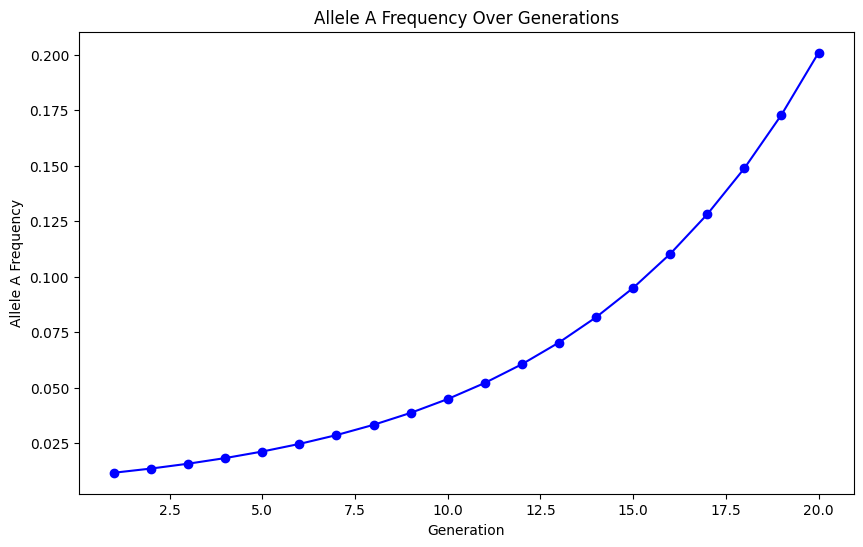

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# Parameters
initial_frequency = 0.01  # Initial frequency of the allele
r = 0.15  # Rate of increase
generations = np.arange(1, 21)  # 20 generations

# Exponential growth of the allele frequency
allele_frequencies = initial_frequency * np.exp(r * generations)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(generations, allele_frequencies, marker='o', linestyle='-', color='blue')
plt.title('Allele A Frequency Over Generations')
plt.xlabel('Generation')
plt.ylabel('Allele A Frequency')
plt.show()

# Calculate Pearson and Spearman correlations
pearson_corr, _ = scipy.stats.pearsonr(generations, allele_frequencies)
spearman_corr, _ = scipy.stats.spearmanr(generations, allele_frequencies)


QUESTION:
1. For these data, which will be greater, the pearson or the spearman correlation?

Suppose we also track the frequency of a allele "B" in the population. The code below generates and plots data for beleficial allele "B".

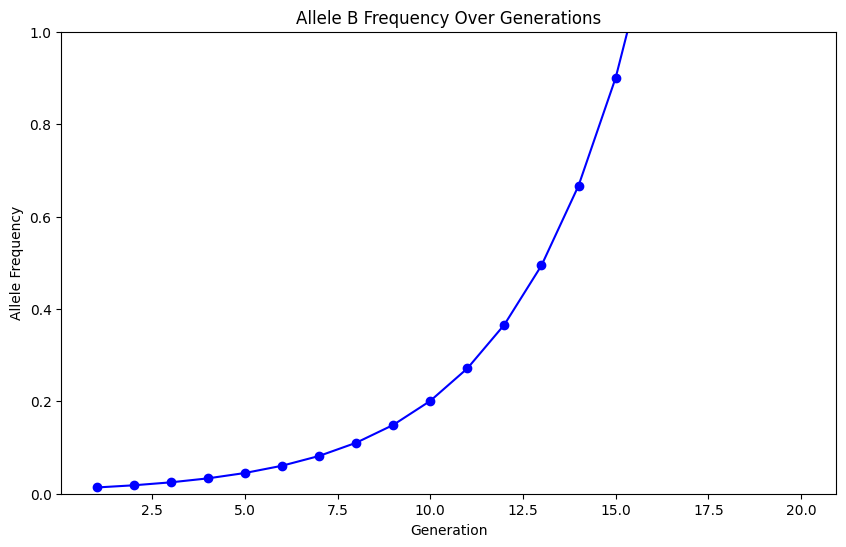

In [79]:
initial_frequency = 0.01  # Initial frequency of the allele
r = 0.3  # Rate of increase
generations = np.arange(1, 21)  # 20 generations

# Exponential growth of the allele frequency
allele_frequencies = initial_frequency * np.exp(r * generations)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(generations, allele_frequencies, marker='o', linestyle='-', color='blue')
plt.title('Allele B Frequency Over Generations')
plt.xlabel('Generation')
plt.ylabel('Allele Frequency')
plt.ylim(0, 1)  # Limit y-axis to 1 for visualization purposes
plt.show()

# Calculate Pearson and Spearman correlations
pearson_corr, _ = scipy.stats.pearsonr(generations, allele_frequencies)
spearman_corr, _ = scipy.stats.spearmanr(generations, allele_frequencies)


QUESTION:
1. Compare the plots of Allele A frequency and Allele B frequency. Which will have a higher pearson correlation coefficient? Which will have a higher spearman correlation coefficient? Why?

Suppose we track a third allele, allele C, and plot its frequency in the population over 20 generations.

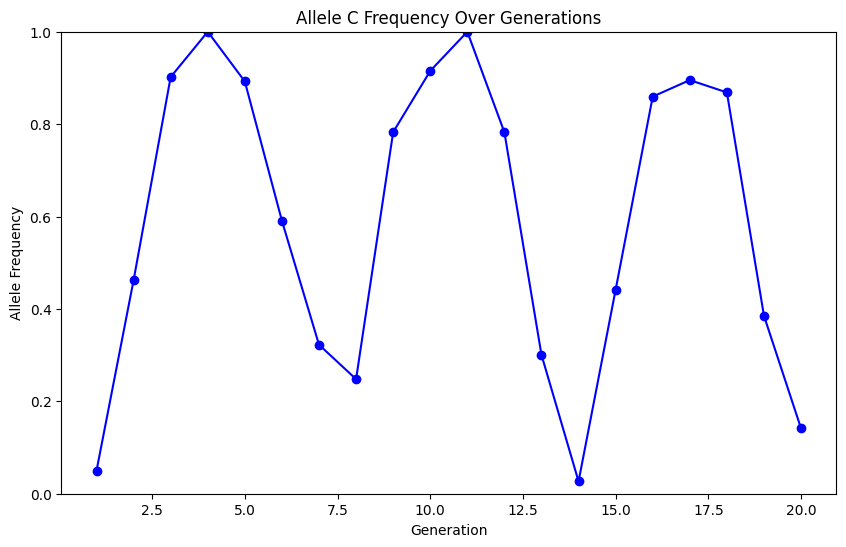

In [78]:
# Generating fluctuating allele frequencies
np.random.seed(42)  # For reproducibility
generations = np.arange(1, 21)  # 20 generations
allele_frequencies = np.abs(np.sin(np.linspace(0, 3 * np.pi, 20)) + np.random.normal(0, 0.1, 20))

# Ensure frequencies are within [0, 1]
allele_frequencies = np.clip(allele_frequencies, 0, 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(generations, allele_frequencies, marker='o', linestyle='-', color='blue')
plt.title('Allele C Frequency Over Generations')
plt.xlabel('Generation')
plt.ylabel('Allele Frequency')
plt.ylim(0, 1)
plt.show()

# Calculate Pearson and Spearman correlations
pearson_corr, _ = scipy.stats.pearsonr(generations, allele_frequencies)
spearman_corr, _ = scipy.stats.spearmanr(generations, allele_frequencies)

QUESTIONS:
1. How will the pearson correlation coefficient of the allele c data compare to the pearson correlation coefficients of alleles a and b?
2. How will the spearman correlation coefficient of the allele c data compare to the spearman correlation coefficients of alleles a and b?
3. Which of these alleles is/are most likely to confer a fitness advantage?

---

I have exciting news! A team of researchers did collect a bunch of data about penguins! The [Palmer Penguing dataset](https://allisonhorst.github.io/palmerpenguins/) was collected by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) at the [Palmer Research Station](https://pallter.marine.rutgers.edu/) in Antarctica. The dataset is commonly used for teaching data analysis techniques.

The code below reads the data into a dataframe and displays the dataframe.

In [80]:
# URL to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Use Pandas to read the CSV file directly from the URL
penguins_df = pd.read_csv(url)

# Print dimensions of the dataframe
print(penguins_df.shape)

penguins_df

(344, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


You can see that the dataset includes observations of 3444 penguins. For each penguin, 8 different features are recorded (species, island, bill length, bill depth, flipper length, body mass, sex, and year).

Lets see how bill length compares to flipper length.

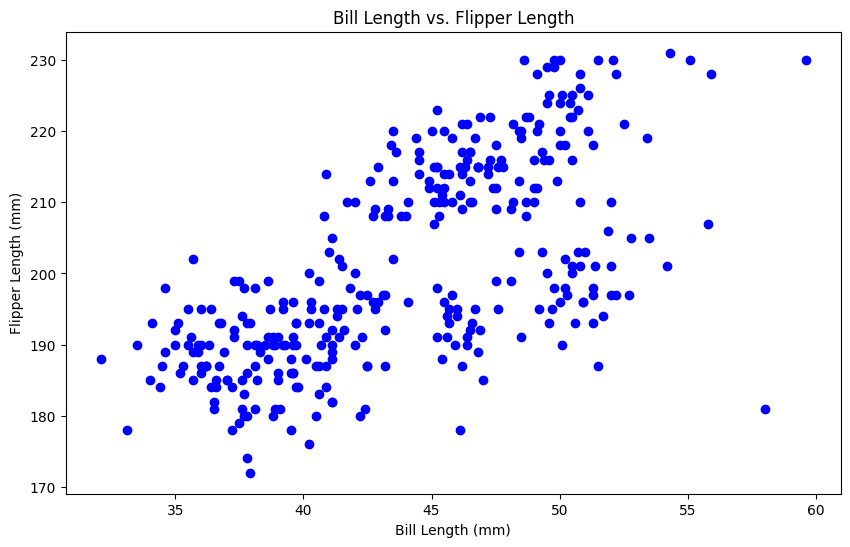

In [81]:
# Drop rows with missing values to simplify this example
penguins_cleaned = penguins_df.dropna(subset=['bill_length_mm', 'flipper_length_mm'])

# Select two continuous variables
bill_length = penguins_cleaned['bill_length_mm']
flipper_length = penguins_cleaned['flipper_length_mm']

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(bill_length, flipper_length, color='blue')

plt.title('Bill Length vs. Flipper Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')

plt.show()

QUESTIONS: For a hint run the cell below.
1. Given what we learned in class about pearson correlation, what do you expect the pearson correlation of these data to be (describe qualitatively, i.e. high, low, medium low, ect). Why?
2. Given what we learned in class about spearman correlation, what do you expect the spearman correlation of these data to be (describe qualitatively, i.e. high, low, medium low, ect). Why?

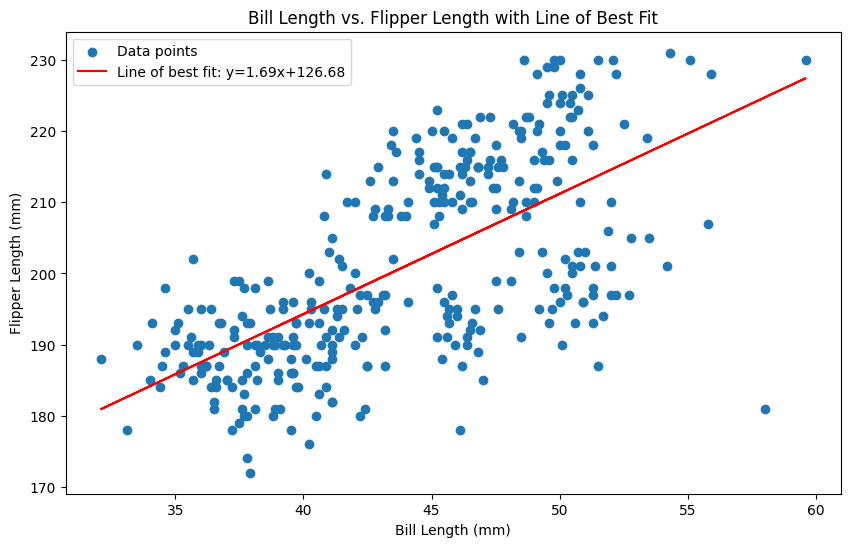

In [60]:
# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bill_length, flipper_length)
line = slope * bill_length + intercept

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(bill_length, flipper_length, label='Data points')

# Plot the line of best fit
plt.plot(bill_length, line, color='red', label=f'Line of best fit: y={slope:.2f}x+{intercept:.2f}')

plt.title('Bill Length vs. Flipper Length with Line of Best Fit')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.show()

The code below calculates the pearson and spearman correlations.

In [53]:
# Calculate Pearson's correlation
pearson_corr, _ = stats.pearsonr(bill_length, flipper_length)
print(f"Pearson's correlation: {pearson_corr:.3f}")

# Calculate Spearman's correlation
spearman_corr, _ = stats.spearmanr(bill_length, flipper_length)
print(f"Spearman's correlation: {spearman_corr:.3f}")

Pearson's correlation: 0.656
Spearman's correlation: 0.673


QUESTION:
1. How do these values compare to your predictions?

Explore the penguins dataset! Try plotting different continuous penguin features against each other using the code below!

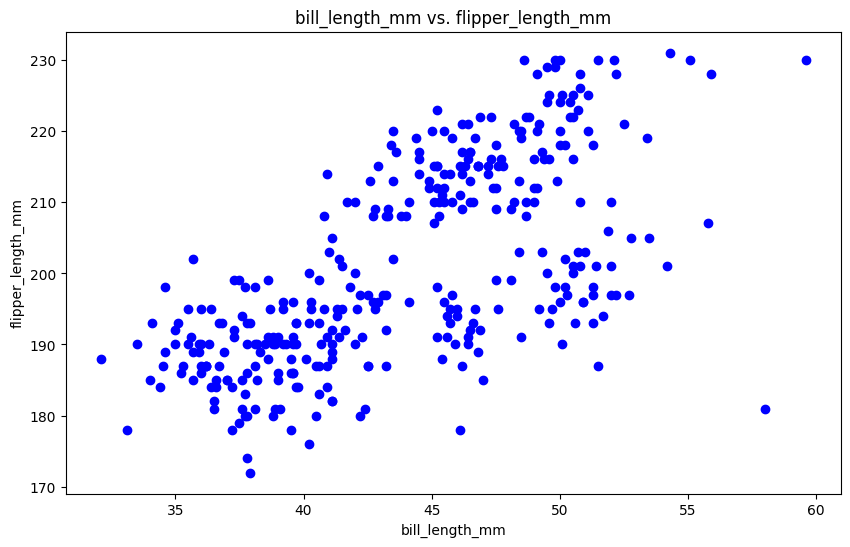

In [85]:
# This is the set of continuous feature titles available in the palmer penguins dataset
["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Select two continuous variables by assigning their string titles to the variables feature1 and feature2
feature1 = "bill_length_mm"
feature2 = "flipper_length_mm"

# Drop rows with missing values
penguins_cleaned = penguins_df.dropna(subset=[feature1, feature2])

# Select two continuous variables
x_axis = penguins_cleaned[feature1]
y_axis = penguins_cleaned[feature2]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, color='blue')

plt.title(f'{feature1} vs. {feature2}')
plt.xlabel(f'{feature1}')
plt.ylabel(f'{feature2}')

plt.show()